In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
## plot the errors by the methods with a heatmap 
# first get the data
def make_graphs(df, save_data):
  metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
  by_method = df.groupby(['METHOD']).mean()[metric_cols]
  by_fn = df.groupby(['FILE_NAME']).mean()[metric_cols]
  by_method_fn = df.groupby(['METHOD','FILE_NAME']).mean()[metric_cols]
  by_nodes = df.groupby(['NUM_NODES']).mean()[metric_cols]
  ## plot the data
  import seaborn as sns 
  ## heatmap with a cmap from green (low values) to red (high values)
  ax = sns.heatmap(by_method, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method")
  plt.savefig(save_data+"mean_metrics_method.png" ,bbox_inches='tight')
  plt.show()
  ax = sns.heatmap(by_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by file")
  plt.savefig(save_data+"mean_metrics_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_method_fn, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by method and file")
  plt.savefig(save_data+"mean_metrics_method_and_file.png" ,bbox_inches='tight')
  plt.show()
  axs = sns.heatmap(by_nodes, cmap='rocket_r',cbar=True, annot=True, fmt=".2f")
  plt.xlabel('Metrics')
  plt.title("Mean of the metrics by number of nodes")
  plt.savefig(save_data+"mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_method.plot(kind='bar')
  plt.savefig(save_data+"bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()
  by_fn.plot(kind='bar')
  plt.savefig(save_data+"_bar_mean_metrics_nodes.png" ,bbox_inches='tight')
  plt.show()

In [8]:
toy_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy.csv'
model_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model.csv'
real_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real.csv'

## save paths for images 
toy_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/toy/'
model_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/model/'
real_save_data = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/real/'
main_save_dir = './drive/MyDrive/Cursos/3_Community_detection/data/model_metrics/'

## dataframes 
df_toy = pd.read_csv(toy_data, index_col=0)
df_model = pd.read_csv(model_data, index_col=0)
df_real = pd.read_csv(real_data, index_col=0)

In [9]:
df_toy.head()

,MODEL_TYPE,FILE_NAME,NUM_NODES,PARTITION_ID,METHOD,NUM_PARTITIONS,GEN_PARTITION,NX_NVI,NX_NMI,NX_RAND_IDX,IG_NVI,IG_NMI,IG_RAND_IDX
0,toy,./data/toy/20x2+5x2.net,50,1,Garvin-Newman,1,True,0.035437,0.938345,0.979592,0.035437,0.938345,0.979592
1,toy,./data/toy/20x2+5x2.net,50,1,Greedy,1,True,0.035437,0.938345,0.979592,0.000000,1.000000,1.000000
2,toy,./data/toy/20x2+5x2.net,50,1,Label-Propagation,1,True,0.000000,1.000000,1.000000,0.035437,0.938345,0.979592
3,toy,./data/toy/graph4+4.net,8,1,Garvin-Newman,1,True,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
4,toy,./data/toy/graph4+4.net,8,1,Greedy,1,True,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000


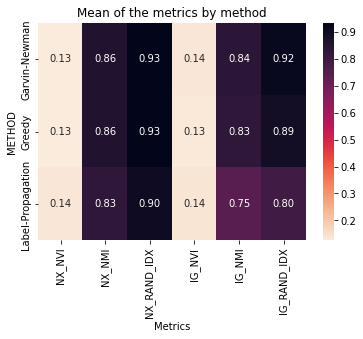

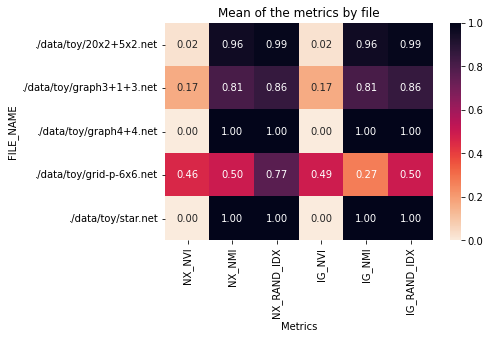

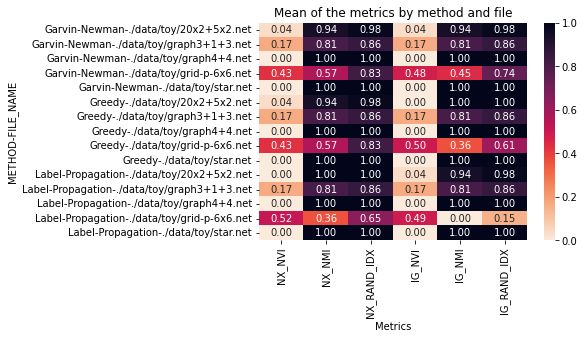

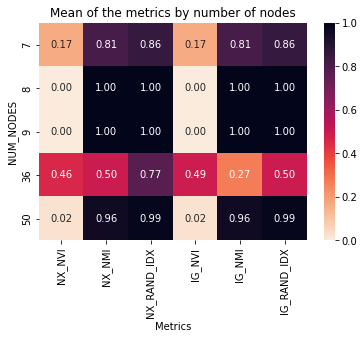

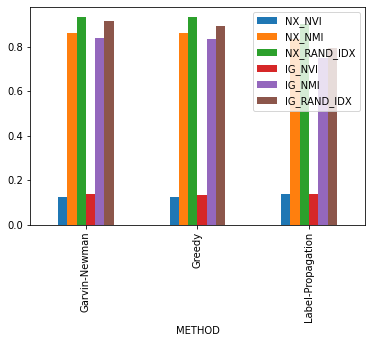

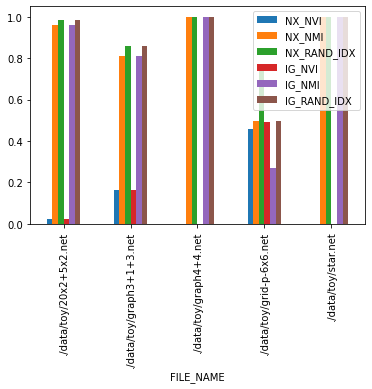

In [10]:
make_graphs(df_toy, toy_save_data)

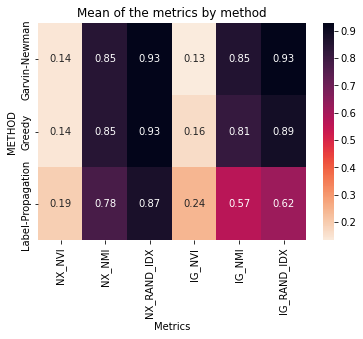

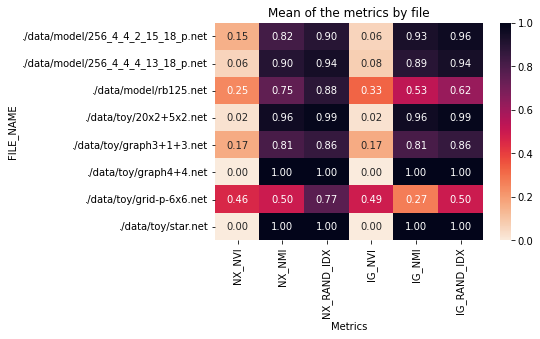

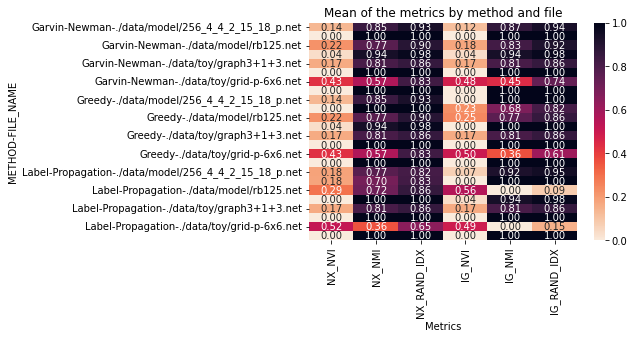

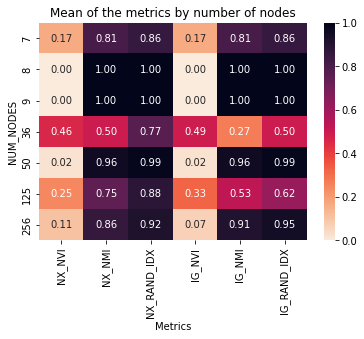

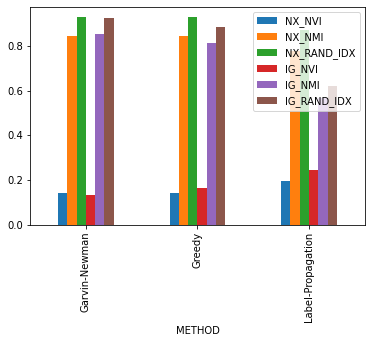

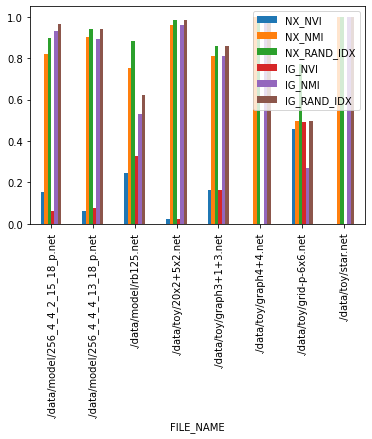

In [11]:
make_graphs(df_model, model_save_data)

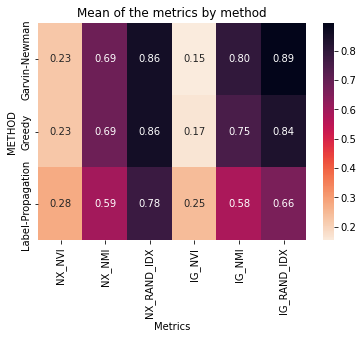

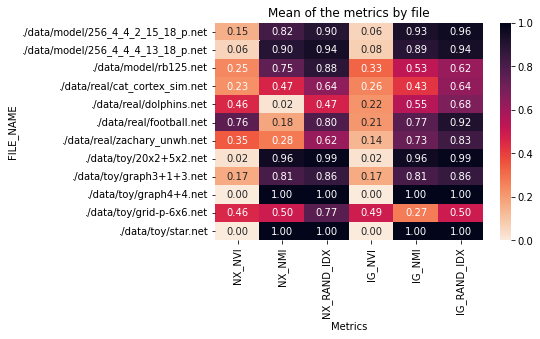

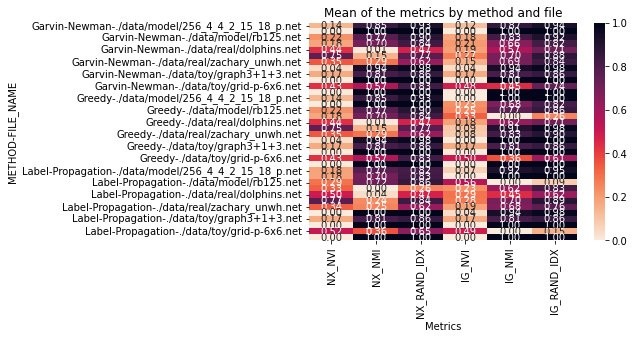

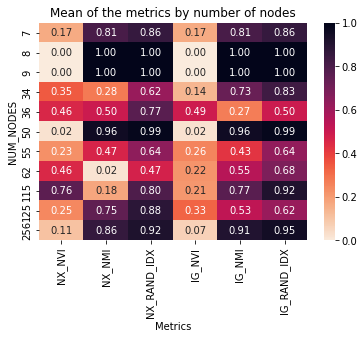

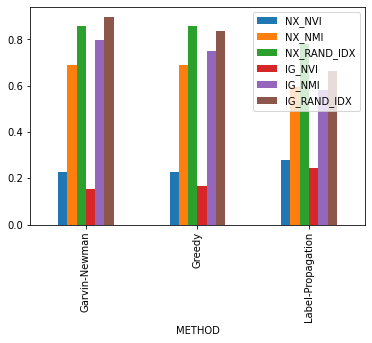

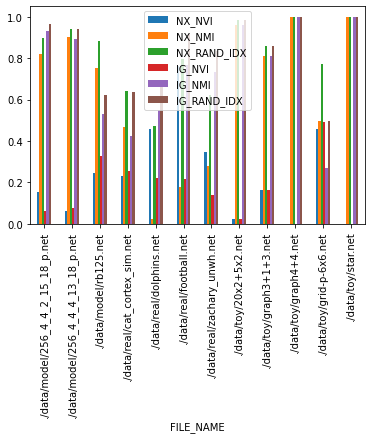

In [12]:
make_graphs(df_real, real_save_data)

In [13]:
df_all = pd.concat([df_toy, df_real, df_model])

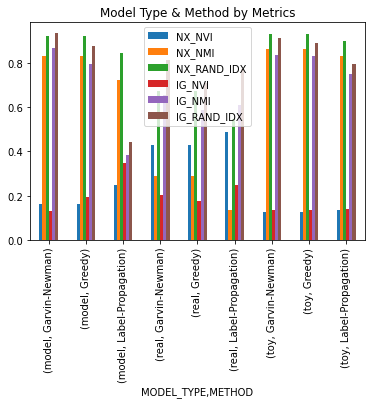

In [14]:
metric_cols = ['NX_NVI','NX_NMI','NX_RAND_IDX','IG_NVI','IG_NMI','IG_RAND_IDX']
df_all.groupby(['MODEL_TYPE','METHOD']).mean()[metric_cols].plot(kind='bar',title='Model Type & Method by Metrics')

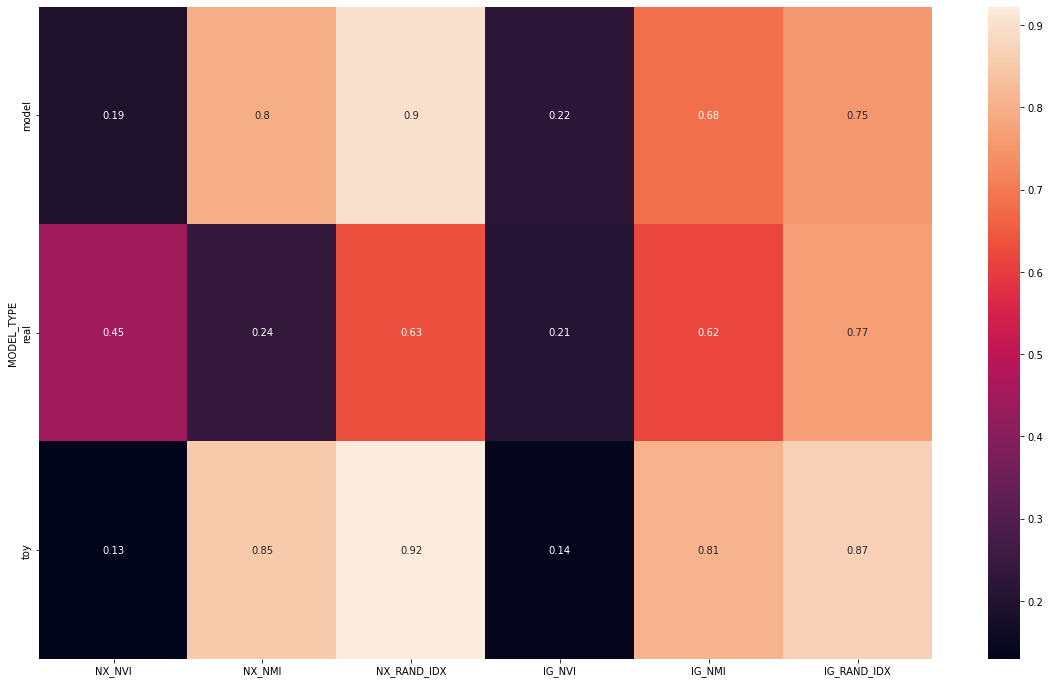

<Figure size 1440x864 with 0 Axes>

In [25]:
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols]
ax = sns.heatmap(g, annot=True)
plt.show()
ax.set_title("All Models & Metrics")
ax.set_xlabel("Metric")
plt.savefig(main_save_dir+"_heatmap_all_modeltype_metrics.png")

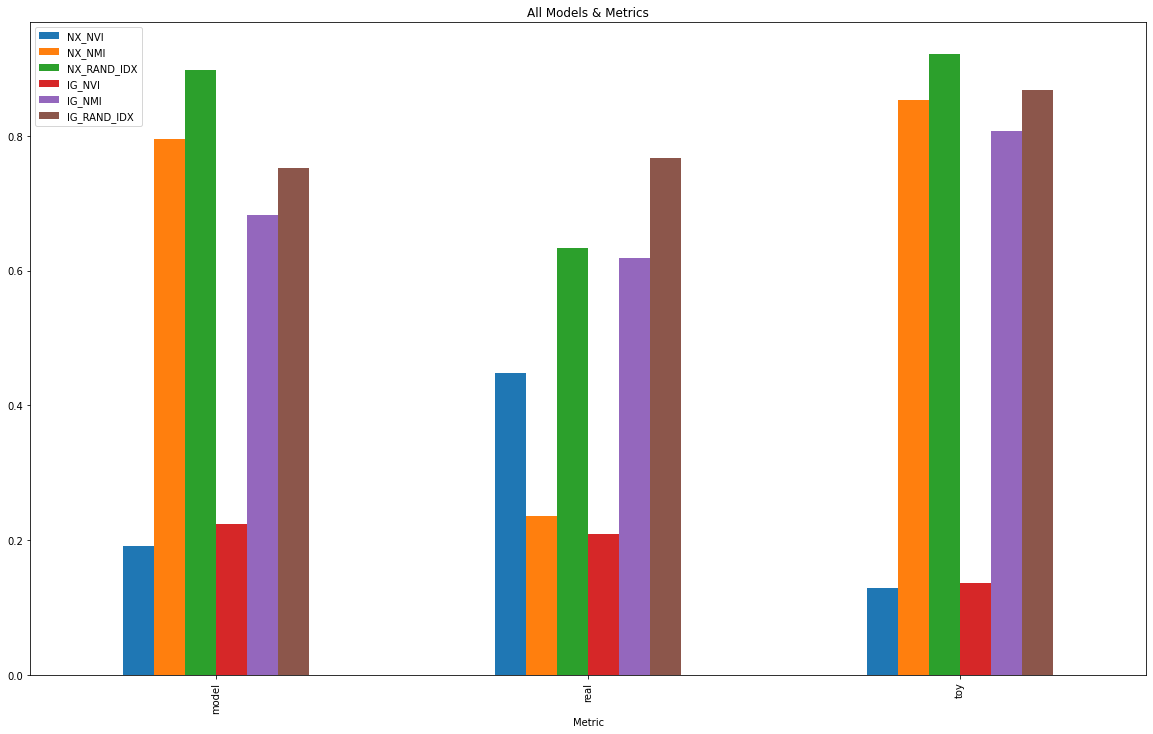

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = (20,12)
g = df_all.groupby(['MODEL_TYPE']).mean()[metric_cols].plot(kind='bar')
#ax = sns.heatmap(g, annot=True)
plt.title("All Models & Metrics")
plt.xlabel("Metric")
plt.savefig(main_save_dir+"_barall_modeltype_metrics.png")